In [2]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]

# Enter GRE words into the `Pandas.DataFrame`
* Checks if entry has already been made for the same word
* To exit the loop give any input of `len(word) < 3`
* It is saved after every entry

In [12]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", 
           "Usage", "Correct", "Incorrect", "Score"]

def numberOfEntries(df, source):
    cond = (df["Source"]==source)
    return len(df["Word"][cond])

default = "trivial"
source = input("Enter the source: ").lower()
if len(source)==0:
    source = default.lower()
    
print("Source = %s\n\n"%source)

if os.path.exists("./dataFrame.p"):
    df = pickle.load(open("./dataFrame.p", "rb"))
else:
    df = pds.DataFrame(columns=columns)

while(True):
    entry = {"Source":source,
            "Correct":0,
            "Incorrect":0,
            "Score":-2.0}
    for col in ["Word", "Meaning", "Usage"]:
        entry[col] = input("Enter the %s: "%col).lower()
        if len(entry[col])<3:
            entry = {"Source":"NULL"}
            break
    if entry["Source"] != "NULL":
        cond = (df["Word"] == entry["Word"])
        if cond.any():
            index = df[cond].index[0]
            row = df.iloc[index]
            print("\nWord %s exists from %s\n\t%s = %s\n\tEx: %s\n"%(row["Word"], row["Source"], 
                                                               row["Word"], row["Meaning"], 
                                                               row["Usage"]))
            cmd = input("Do you wish to replace? Y/N ").lower()
            if cmd=='y':
                df.at[index, "Meaning"] = entry["Meaning"]
                df.at[index, "Usage"] = entry["Usage"]
                print("Modification for %s is done"%(entry["Word"]))
                pickle.dump(df, open("./dataFrame.p", "wb"))
        else:
            df = df.append(entry, ignore_index=True, )
            pickle.dump(df, open("./dataFrame.p", "wb"))
            print("Entry of '%s' made\nCurrent entry count:%d\n"%(entry["Word"], numberOfEntries(df, source)))
    else:
        print("\nEnding the entry!".upper())
        break

print("\nWord Count in %s: %d / %d"%(source, numberOfEntries(df, source), len(df)-2))

Enter the source: 
Source = trivial


Enter the Word: protract
Enter the Meaning: lengthen in time; cause to be or last longer
Enter the Usage: If you have a disagreement with a friend that you continue for weeks and weeks, you are protracting the argument
Entry of 'protract' made
Current entry count:6

Enter the Word: sully
Enter the Meaning: make dirty or spotty, as by exposure to air; also used metaphorically
Enter the Usage: If you spread false rumors that there's chicken stock in the vegetarian entree at Joe's Diner, you would sully Joe's good reputation
Entry of 'sully' made
Current entry count:7

Enter the Word: foil
Enter the Meaning: hinder or prevent (the efforts, plans, or desires) of
Enter the Usage: foil your opponent
Entry of 'foil' made
Current entry count:8

Enter the Word: fealty
Enter the Meaning: allegiance; the loyalty that citizens owe to their country (or subjects to their sovereign)
Enter the Usage: Most school kids pledge their fealty, or allegiance, to the Unit

# Dictionary implementation
* Paste this cell into a terminal of the same directory and go nuts!
* Given a word, its meaning and other details will be given

In [109]:
import pandas as pds
import os
import numpy as np
import pickle
from nltk.corpus import wordnet 

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name()) 
    synonyms = sorted(list(set(synonyms)))
    outStr = ""
    for syn in synonyms:
        if syn != word:
            outStr += syn
            outStr += ", "
    return outStr

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]

while(True):
    if os.path.exists("./dataFrame.p"):
        df = pickle.load(open("./dataFrame.p", "rb"))
    else:
        df = pds.DataFrame(columns=columns)
    word = input("Enter the word: ").lower()
    if word=="clc":
        os.system("clear")
        continue
    if len(word)<3:
        print("\nDictionary closed!".upper())
        break
    cond = (df["Word"] == word)
    if cond.any():
        index = df[cond].index[0]
        row = df.iloc[index]
        mean = row["Meaning"]
        mean = mean.replace("2" , "\n2")
        usage = row["Usage"]
        usage = usage.replace("2", "\n2")
        print("\nSource : %s : %.2f%%\n%s = %s\n\nEx: %s\nSynonyms: %s\n"%(row["Source"], 
                                                            row["Score"]*100.0,
                                                            row["Word"], 
                                                            mean, 
                                                            usage,
                                                                       get_synonyms(word)))
    else:
        print("Word '%s' not found in database.\nPlease check spelling or Enter the word in entry section\n"%word)

# Print the words into a file

In [22]:
import pandas as pds
import os
import numpy as np
import pickle

columns = ["Source", "Word", "Meaning", "Usage", "Correct", "Incorrect", "Score"]
df = pickle.load(open("./dataFrame.p", "rb"))
cond = (df["Score"]<=0.1)#| ((df["Score"]>0.5) & (df["Correct"]==1))
df = df[cond]
print(len(df))
sorted_df = df.sort_values(by="Word")

f = open("Words_zero.txt", "w")
for i,(word,meaning,usage) in enumerate(zip(sorted_df["Word"], 
                                       sorted_df["Meaning"], 
                                       sorted_df["Usage"])):
    meaning = meaning.replace("2", "\n2")
    usage = usage.replace("2", "\n2")
    f.write("%d. %s:\n%s\nEx:  %s\n\n"%(i+1, word, meaning, usage))
#     f.write("%d,%s\n"%(i+1, word))
f.close()

284


# Revise Script V 1.0

In [1]:
import pandas as pds
import os
import numpy as np
import pickle
from nltk.corpus import wordnet 

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name()) 
    synonyms = sorted(list(set(synonyms)))
    outStr = ""
    for syn in synonyms:
        if syn != word:
            outStr += syn
            outStr += ", "
    return outStr
# cond = df["Source"] == "princeton"
df = pickle.load(open("./dataFrame.p", "rb"))
temp_df = df.sample(frac=1).reset_index(drop=True)
words = []
scores = {}

for (word, score, src, c, ic) in zip(temp_df["Word"], temp_df["Score"], 
                              temp_df["Source"], temp_df["Correct"], 
                              temp_df["Incorrect"]):
    if (score<0.61):
        words.append(word)
        scores[word] = score

def key_scores(word):
    global scores
    return scores[word]

sorted_words = sorted(words, key=key_scores)
length = len(sorted_words)
fin_score = 0

for i,word in enumerate(sorted_words):
    cond = (df["Word"] == word)
    index = df[cond].index[0]
    row = df.iloc[index]
    mean = row["Meaning"]
    mean = mean.replace("2" , "\n2")
    usage = row["Usage"]
    usage = usage.replace("2", "\n2")
    s = row["Score"]
    if s == -2:
        string = "New"
    else:
        string = str(int(s*100.))
    
    temp = input("%d/%d) %s => Score: %s%%"%(i+1, length, word.upper(), string))
    print("\nSource : %s\n%s = %s\n\nEx: %s\nSynonyms: %s"%(row["Source"], 
                                                row["Word"].upper(), 
                                                mean, 
                                                usage, get_synonyms(row["Word"])))
    correct = input("Remember? :: Y/N ").lower()
    if len(correct) == 0:
        break
     
    if (correct[0] == "y"):
        df.at[index, "Correct"] += 1
        fin_score += 1
    else:
        df.at[index, "Incorrect"] += 2
    os.system("clear")
    c = df.at[index, "Correct"]
    ic = df.at[index, "Incorrect"]
    
    df.at[index, "Score"] = float(c)/float(c+ic)
    pickle.dump(df, open("./dataFrame.p", "wb"))
    

print("\nEnding revision %d/%d!"%(fin_score, i))

1/131) ZEALOUS => Score: New%

Source : princeton
ZEALOUS = avid; marked by active interest and enthusiasm

Ex: the council was extremely zealous in the application of the regulations

Remember? :: Y/N 

Ending revision 0/0!


# Revise Script V 1.1

In [171]:
import pandas as pds
import os
import numpy as np
import pickle
from nltk.corpus import wordnet 

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name()) 
    synonyms = sorted(list(set(synonyms)))
    outStr = ""
    for syn in synonyms:
        if syn != word:
            outStr += syn
            outStr += ", "
    return outStr

# cond = df["Source"] == "princeton"
df = pickle.load(open("./dataFrame.p", "rb"))
temp_df = df.sample(frac=1).reset_index(drop=True)
words = []
scores = {}

for (word, score, src, c, ic) in zip(temp_df["Word"], temp_df["Score"], 
                              temp_df["Source"], temp_df["Correct"], 
                              temp_df["Incorrect"]):
    if (score>=0.8):
        words.append(word)
        scores[word] = score

def key_scores(word):
    global scores
    return scores[word]

sorted_words = sorted(words, key=key_scores)
length = len(sorted_words)
fin_score = 0
os.system("clear")
print("Corpus Length:%d"%length)
groupSize = input("Group size for revision: ")
if len(groupSize)<2:
    groupSize = 30
else:
    groupSize = int(groupSize)

incWords = ["artifice",]
groupCount = int(np.ceil(length/groupSize))
reviseCount = 1

for groupIndex in range(groupCount):
    currSet = sorted_words[groupIndex*groupSize:(groupIndex+1)*groupSize]
    for sweepIndex in range(reviseCount):
        np.random.shuffle(currSet)
        x = 0
        for i, word in enumerate(currSet):
            cond = (df["Word"] == word)
            index = df[cond].index[0]
            row = df.iloc[index]
            mean = row["Meaning"]
            mean = mean.replace("2" , "\n2")
            usage = row["Usage"]
            usage = usage.replace("2", "\n2")
            s = row["Score"]
            if s == -2:
                string = "New"
            else:
                string = str(int(s*100.))

            temp = input("G%d/%d: R%d/%d: W%d/%d) %s => Score: %s%%"%(groupIndex+1, groupCount, sweepIndex+1,reviseCount,
                                                         i+1, groupSize, word.upper(), string))
            print("\nSource : %s\n%s = %s\n\nEx: %s\nSynonyms: %s"%(row["Source"], 
                                                        row["Word"].upper(), 
                                                        mean, 
                                                        usage, get_synonyms(row["Word"])))
            correct = input("Remember? :: Y/N ").lower()
            if len(correct) == 0:
                correct = input("Remember? :: Y/N ").lower()

            if (correct[0] == "y"):
                df.at[index, "Correct"] += 1
                x += 1
                fin_score += 1
            else:
                incWords.append(word)
                df.at[index, "Incorrect"] += (1+ (sweepIndex//2))
            os.system("clear")
            c = df.at[index, "Correct"]
            ic = df.at[index, "Incorrect"]

            df.at[index, "Score"] = float(c)/float(c+ic)
            pickle.dump(df, open("./dataFrame.p", "wb"))
        print("Score: G%d/%d :: %d/%d"%(groupIndex+1, groupCount, x, groupSize))

print("\nEnding revision %d/%d!"%(fin_score, i))


In [19]:
import pickle
df = pickle.load(open("./dataFrame.p", "rb"))
df[(df["Meaning"].str.contains('narrow'))]

,Source,Word,Meaning,Usage,Correct,Incorrect,Score
192,mag_c1,parochial,narrowly restricted in scope or outlook,"jasmine was sad to admit it, but her fledgling...",1,2,0.333333
322,mag_c4,pedantic,marked by a narrow focus on or display of lear...,professor thompson was regarded as an expert i...,1,2,0.333333


In [14]:
import pickle
df = pickle.load(open("./dataFrame.p", "rb"))
# df["Meaning"][df["Meaning"].str.contains("negative")]
len(df[(df["Score"]) >= 0.99])

721

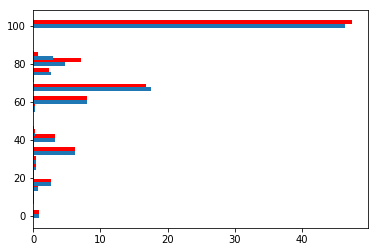

In [20]:
import pickle
prevScores = scores
pKeys = sorted(list(prevScores.keys()))
plt.barh([key*100+2 for key in pKeys], [prevScores[key]/len(df["Word"])*100. for key in pKeys], height=2, color="r")

df = pickle.load(open("./dataFrame.p", "rb"))
scores = {}
temp = []
for word,score in zip(df["Word"], df["Score"]):
    if score>=0:
        try:
            scores[score] += 1
        except:
            scores[score] = 1
        temp.append(score)
# plt.hist(temp)
# plt.show()

        
        
keys = sorted(list(scores.keys()))
for key in keys:
    count = scores[key]
#     print("Score: %.2f -> Fraction: %.2f | %d"%(key*100.,count/len(df["Word"])*100., count))
    
from matplotlib import pyplot as plt
plt.barh([key*100 for key in keys], [scores[key]/len(df["Word"])*100. for key in keys], height=2)
plt.show()

In [21]:
# import pickle
# df = pickle.load(open("./dataFrame.p", "rb"))
# scores = {}
# for word,mean,usage,score in zip(df["Word"], df["Meaning"], df["Usage"], df["Score"]):
#     if score<0.33:
#         print("%s,%s,%s,%.2f"%(word,mean,usage,score*100.))

In [11]:
x = [1,3,5]

In [15]:
x[2:4]

[5]

In [45]:
words

NameError: name 'words' is not defined

In [8]:
# from nltk.corpus import wordnet
# from itertools import product

# def isSimilar(word1, word2, th=0.3):
#     wordFromList1 = wordnet.synsets(word1)
#     wordFromList2 = wordnet.synsets(word2)
#     for w1, w2 in product(wordFromList1, wordFromList2):
#         d = wordnet.wup_similarity(w1, w2)
        
#         if (d!=None) and (d>=th):
#             return True
        
# #         if (d == None):
# #             return False
# #         elif (d!=None) and (d<th):
# #             return False
#     return False
    
# def doesBelong(word1, wordList):
#     for word2 in wordList:
#         if not isSimilar(word1, word2):
#             return False
#     return True

# words = sorted(list(df["Word"].values))
# groups = []
# for a, word in enumerate(words):
#     match = False
#     for i,group in enumerate(groups):
#         if doesBelong(word, group):
#             match = True
#             groups[i].append(word)
#     groups.append([word])
#     if (a+1)%100 == 0:
#         print("%d/%d"%(a+1, len(words)))

In [88]:
from nltk.corpus import wordnet
from itertools import product

def isSimilar(word1, word2, th=0.3):
    wordFromList1 = wordnet.synsets(word1)
    wordFromList2 = wordnet.synsets(word2)
    for w1, w2 in product(wordFromList1, wordFromList2):
        d = wordnet.wup_similarity(w1, w2)
        
        if (d!=None) and (d>=th):
            return True
        
#         if (d == None):
#             return False
#         elif (d!=None) and (d<th):
#             return False
    return False

isSimilar("dirge", "sad")

False